In [6]:
import torch
from agent import DQN, ExponentialSchedule, train_dqn
from env import PokerEnvironment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def moving_average(data, *, window_size=50):
    """Smooths 1-D data array using a moving average.

    Args:
        data: 1-D numpy.array
        window_size: Size of the smoothing window

    Returns:
        smooth_data: A 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    if len(data) < window_size:
        return data
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(np.ones_like(data), kernel)
    return smooth_data[: -window_size + 1]

Episode: 361406 | Steps: 3 | Return: -0.50(-1.00  0.00) | Epsilon: 0.05: 100%|██████████| 1500000/1500000 [1:56:40<00:00, 214.28it/s] 


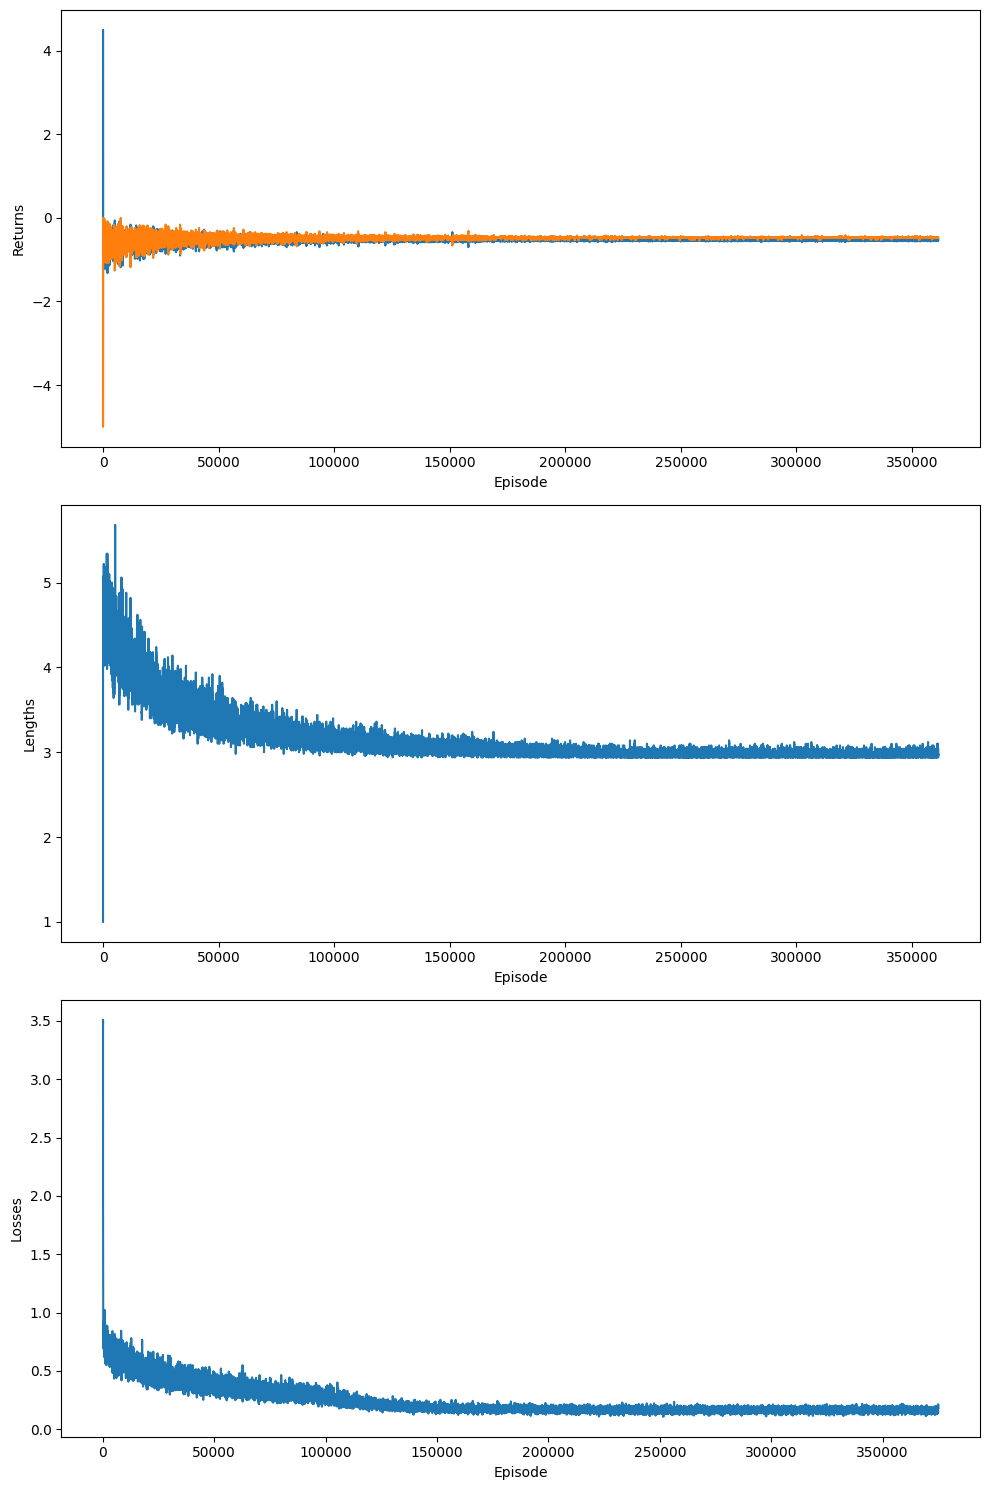

In [3]:
try:
    env = PokerEnvironment()
    gamma = 0.99

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 1_500_000
    num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 200_000
    replay_prepopulate_steps = 50_000

    batch_size = 64
    exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(checkpoint, f"models/checkpoint_poker_{num_steps}.pt")
    np.savez(f"data_backups/{num_steps}_data.npz", arr1=returns, arr2=lengths, arr3=losses)
    
    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")


In [ ]:
try:
    env = PokerEnvironment()
    gamma = 0.99

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 3_000_000
    num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 200_000
    replay_prepopulate_steps = 50_000

    batch_size = 64
    exploration = ExponentialSchedule(1.0, 0.05, 2_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        model_num_layers=32,
        model_hidden_dim=1024,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(checkpoint, f"models/checkpoint_poker_32x1024_{num_steps}.pt")
    np.savez(
        f"data_backups/32x1024_{num_steps}_data.npz",
        arr1=returns,
        arr2=lengths,
        arr3=losses,
    )

    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training_32x1024_{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")

Episode: 1689 | Steps: 4 | Return: -0.50(-1.00  0.00) | Epsilon: 0.99:   0%|          | 9392/3000000 [03:11<16:55:28, 49.08it/s] 


KeyboardInterrupt: 

In [1]:
try:
    env = PokerEnvironment()
    gamma = 0.99

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 3_000_000
    num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 200_000
    replay_prepopulate_steps = 50_000

    batch_size = 64
    exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        model_num_layers=8,
        model_hidden_dim=256,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(checkpoint, f"models/checkpoint_poker_8x256_{num_steps}.pt")
    np.savez(
        f"data_backups/8x256_{num_steps}_data.npz",
        arr1=returns,
        arr2=lengths,
        arr3=losses,
    )
    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training_8x256_{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")

FAILED: name 'PokerEnvironment' is not defined


Episode: 19544 | Steps: 4 | Return: -0.50(-1.00  0.00) | Epsilon: 0.74: 100%|██████████| 100000/100000 [03:05<00:00, 538.80it/s]


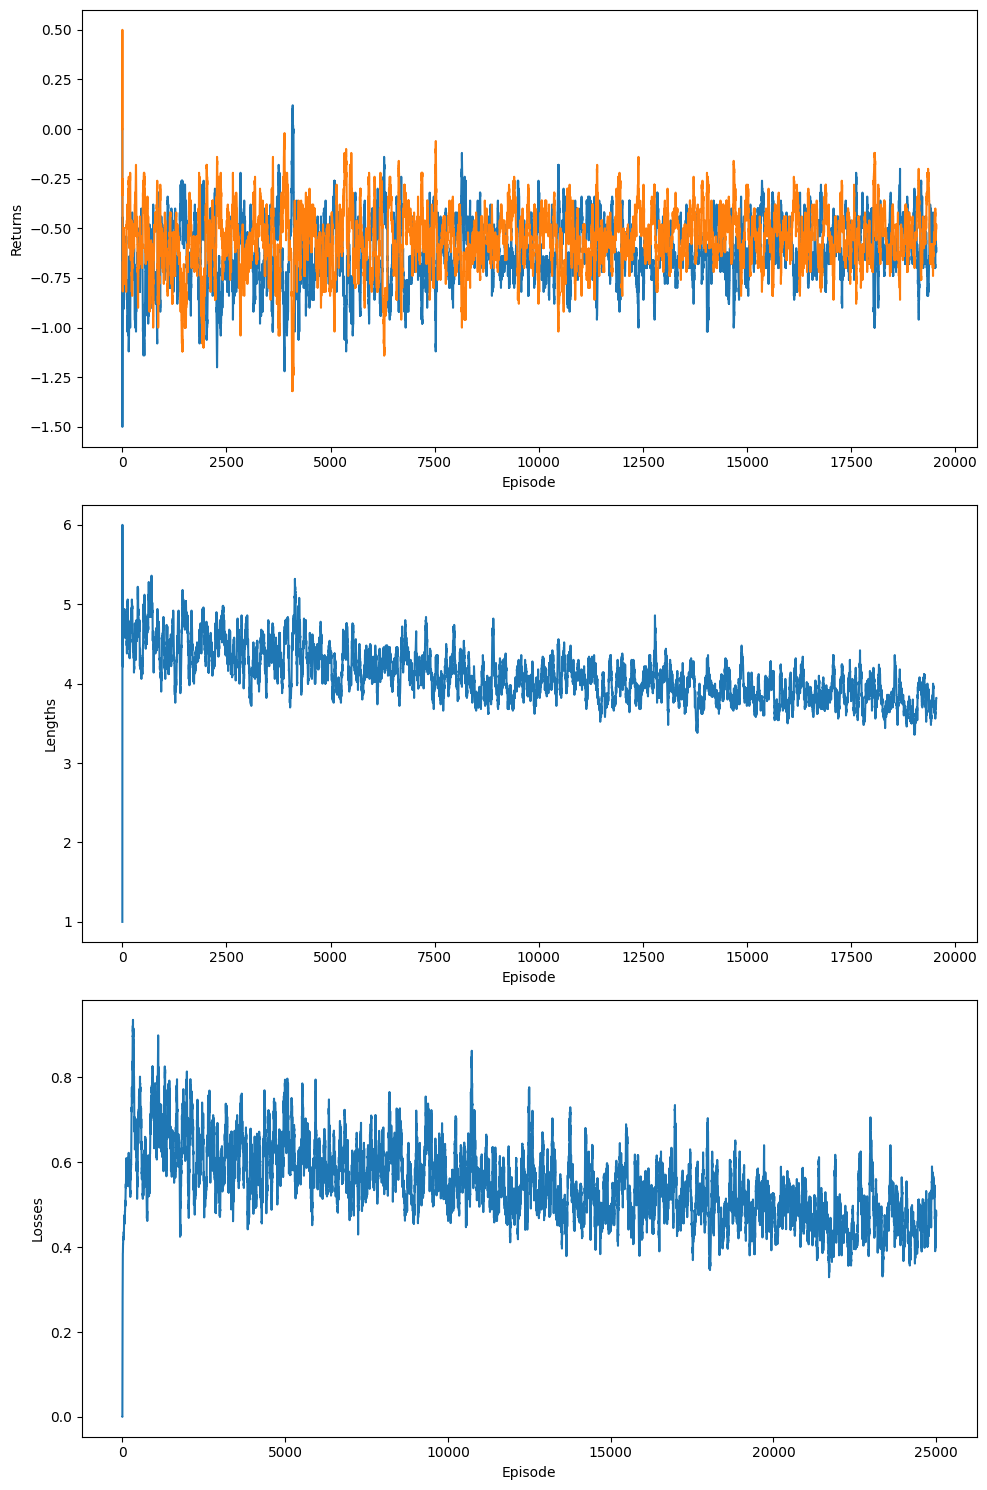

In [ ]:
try:
    env = PokerEnvironment()
    gamma = 1

    # We train for many time-steps; as usual, you can decrease this during development / debugging,
    # but make sure to restore it to 1_500_000 before submitting
    num_steps = 3_000_000
    num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

    replay_size = 200_000
    replay_prepopulate_steps = 50_000

    batch_size = 64
    exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

    model_class = DQN

    # This should take about 1-2 hours on a generic 4-core laptop
    dqn_models, returns, lengths, losses = train_dqn(
        env,
        num_steps,
        num_saves=num_saves,
        model=model_class,
        model_num_layers=8,
        model_hidden_dim=256,
        replay_size=replay_size,
        replay_prepopulate_steps=replay_prepopulate_steps,
        batch_size=batch_size,
        exploration=exploration,
        gamma=gamma,
    )

    assert len(dqn_models) == num_saves
    assert all(isinstance(value, model_class) for value in dqn_models.values())

    # Saving computed models to disk, so that we can load and visualize them later
    checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
    torch.save(checkpoint, f"models/checkpoint_poker_8x256_gamma1_{num_steps}.pt")
    np.savez(
        f"data_backups/8x256_gamma1_{num_steps}_data.npz",
        arr1=returns,
        arr2=lengths,
        arr3=losses,
    )
    # YOUR PLOTTING CODE HERE
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    for player_returns in returns:
        axs[0].plot(moving_average(player_returns, window_size=50))
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Returns")

    axs[1].plot(moving_average(lengths, window_size=50))
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Lengths")

    axs[2].plot(moving_average(losses, window_size=50))
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Losses")

    plt.tight_layout()
    plt.savefig(f"graphs/poker_training_8x256_gamma1_{num_steps}.png")
    plt.show()
except Exception as e:
    print(f"FAILED: {e}")

In [ ]:
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 100_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 5_000_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 2_000_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    model_num_layers=50,
    model_hidden_dim=1024,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f"models/checkpoint_poker_50x1024_{num_steps}.pt")

In [3]:
import ipywidgets as widgets

In [4]:
def render(env: PokerEnvironment, policy=None, pvp=False, mutiple_rounds=False):
    """Graphically render an episode using the given policy

    :param env: Gymnasium environment
    :param policy: Function which maps state to action.  If None, the random
                   policy is used.
    """

    if policy is None:
        # Random policy
        def policy(state):
            return env.action_space.sample()

    # Basic gym loop
    player, state = env.reset()
    if not pvp or player == 0:
        env.render()
    while not mutiple_rounds or not env.game_over:
        if pvp and player == 0:
            action = int(input("Enter action(Fold: 0, Call: 1, Raise: 2, All in: 3): "))
        else:
            action = policy(state)
        player, next_state, reward, terminated = env.step(action)
        if not pvp or env.round == 4 or player == 0:
            env.render()
        if terminated:
            break
        state = next_state

NameError: name 'PokerEnvironment' is not defined

In [ ]:
buttons_all = []
model_class = DQN(17, 3)
env = PokerEnvironment()
try:
    checkpoint = torch.load(
        f"models/checkpoint_poker_1500000.pt"
    )
except FileNotFoundError:
    print("No checkpoint found")
    pass
else:
    buttons = []
    for key, value in checkpoint.items():
        print("loading")
        dqn = model_class.custom_load(value)

        def make_callback(env, dqn):
            def button_callback(button):
                for b in buttons_all:
                    b.disabled = True

                render(
                    env,
                    lambda state: dqn(
                        torch.tensor(state, dtype=torch.float).unsqueeze(0)
                    )
                    .argmax()
                    .item(),
                )

                for b in buttons_all:
                    b.disabled = False

            return button_callback

        button = widgets.Button(description=f'{key.replace("_", ".")}%')
        button.on_click(make_callback(env, dqn))
        buttons.append(button)

    # print(f"{key_env}:")
    display(widgets.HBox(buttons))
    buttons_all.extend(buttons)

NameError: name 'env' is not defined